# EXTRA SIMULATION: AVERAGE NUMBER OF DAYS (INFECTED TO DIE)

The idea of this simulations is to use the worlwide cases of the last dataset, delay this time series a DELAY value and stack this feature to the worlwide deaths of the same dataset. Therefore, changing the delay we can observe when the predictions are better and it will indicate what is the most proper value for the average number of days a people infected last in average to die in the world.

In [1]:
%matplotlib notebook
from config_generator import config_generator
from main_project import main_project
from matplotlib import pyplot as plt

In [3]:
import pandas as pd

In [45]:
#FOR DATASET MODULE WE EXTRACT THIS PART OF THE CODE dataset_prepare.py

mode = 'cum'
name = 'worldwide_cases'

if name == 'worldwide_cases' or name == 'worldwide_deaths':
    #Cases or Deaths for each country of the world
    variable = 'initial'
    SELECT_REGION = 'world'
    data4 = pd.read_csv('Datasets/WHO-COVID-19-global-data.csv', parse_dates=['Date_reported'])
    if mode == 'diff':
        if name == 'worldwide_deaths':
            variable = ' New_deaths'
        if name == 'worldwide_cases':
            variable = ' New_cases'

    if mode == 'cum':
        if name == 'worldwide_deaths':
            variable = ' Cumulative_deaths'
        if name == 'worldwide_cases':
            variable = ' Cumulative_cases'

    # Sum the time series for all the countries of the world, matching the dates.
    dict = {}
    for i, state in enumerate(data4[[' Country_code']].values.squeeze()):
        dict[state] = 1
    all_countries = {}

    if SELECT_REGION in dict.keys():  # We select only one country instead of all the world
        dict = {}
        dict[SELECT_REGION] = 0

    for i, country in enumerate(dict.keys()):

            data5 = (data4[[' Country_code']] == country)
            data6 = data5[data5].dropna()
            data_com = data4.iloc[data6.index]
            dat_com = data_com.set_index('Date_reported')
            dat_com = dat_com.ewm(7.).mean()

            for data in dat_com.index:

                if data in all_countries.keys():
                    all_countries[data] += dat_com[[variable]].loc[data]
                else:
                    all_countries[data] = dat_com[[variable]].loc[data]

    world_series = pd.DataFrame(all_countries)
    world_series = world_series.T
    world_series.reset_index(inplace=True)
    world_series.sort_values('index', inplace=True)
    world_series.set_index('index', inplace=True)
    world_series = world_series.iloc[0:-1]
    data_clean_cases = world_series.T


In [6]:
data_clean_cases

index,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,2020-01-11,2020-01-12,2020-01-13,...,2020-08-03,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12
New_cases,1.0,0.466667,1.426036,0.99528,0.739866,0.572082,0.454332,8.175656,6.714344,10.575431,...,255289.124523,250310.108913,245319.845267,247450.489574,251631.678372,255483.343553,258715.675591,258307.966161,253296.970375,248491.974078


In [46]:
mode = 'cum'
name = 'worldwide_deaths'

if name == 'worldwide_cases' or name == 'worldwide_deaths':
    #Cases or Deaths for each country of the world
    variable = 'initial'
    SELECT_REGION = 'world'
    data4 = pd.read_csv('Datasets/WHO-COVID-19-global-data.csv', parse_dates=['Date_reported'])
    if mode == 'diff':
        if name == 'worldwide_deaths':
            variable = ' New_deaths'
        if name == 'worldwide_cases':
            variable = ' New_cases'

    if mode == 'cum':
        if name == 'worldwide_deaths':
            variable = ' Cumulative_deaths'
        if name == 'worldwide_cases':
            variable = ' Cumulative_cases'

    # Sum the time series for all the countries of the world, matching the dates.
    dict = {}
    for i, state in enumerate(data4[[' Country_code']].values.squeeze()):
        dict[state] = 1
    all_countries = {}

    if SELECT_REGION in dict.keys():  # We select only one country instead of all the world
        dict = {}
        dict[SELECT_REGION] = 0

    for i, country in enumerate(dict.keys()):

            data5 = (data4[[' Country_code']] == country)
            data6 = data5[data5].dropna()
            data_com = data4.iloc[data6.index]
            dat_com = data_com.set_index('Date_reported')
            dat_com = dat_com.ewm(7.).mean()

            for data in dat_com.index:

                if data in all_countries.keys():
                    all_countries[data] += dat_com[[variable]].loc[data]
                else:
                    all_countries[data] = dat_com[[variable]].loc[data]

    world_series = pd.DataFrame(all_countries)
    world_series = world_series.T
    world_series.reset_index(inplace=True)
    world_series.sort_values('index', inplace=True)
    world_series.set_index('index', inplace=True)
    world_series = world_series.iloc[0:-1]
    data_clean_deaths = world_series.T

In [8]:
data_clean_deaths

index,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,2020-01-11,2020-01-12,2020-01-13,...,2020-08-03,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12
New_deaths,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.190435,0.156397,0.129868,...,5862.876898,5629.517284,5565.952625,5682.708545,5824.369978,5918.69873,5998.736388,5952.269339,5742.610671,5629.159337


In [ ]:
data_clean_deaths

index,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,2020-01-11,2020-01-12,2020-01-13,...,2020-07-19,2020-07-20,2020-07-21,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,2020-07-28
New_cases,1.0,0.466667,1.426036,0.99528,0.739866,0.572082,0.454332,8.175656,6.714344,10.575431,...,216103.324951,217944.65905,216980.451412,215285.769805,219417.548456,227727.979805,235008.357699,240280.688053,242211.727283,239691.261248


{0: 'worldwide_deaths', 1: 'cum', 2: 'gompertz', 3: 'xgb', 4: False, 6: 200, 7: 60, 8: 0, 9: 1, 10: 0.3, 11: 0.3, 12: 50, 13: 2, 14: True, 15: True, 16: True}
Adjusted parameters for fitting the trend:  {'world': 7}
index               2020-01-04  2020-01-05  2020-01-06  2020-01-07  \
 Cumulative_deaths         0.0         0.0         0.0         0.0   

index               2020-01-08  2020-01-09  2020-01-10  2020-01-11  \
 Cumulative_deaths         0.0         0.0         0.0    0.190435   

index               2020-01-12  2020-01-13  ...     2020-08-03     2020-08-04  \
 Cumulative_deaths    0.335136    0.447913  ...  646049.862708  651679.379891   

index                  2020-08-05     2020-08-06     2020-08-07  \
 Cumulative_deaths  657245.332424  662928.040887  668752.410792   

index                  2020-08-08     2020-08-09     2020-08-10  \
 Cumulative_deaths  674671.109455  680669.845783  686622.115068   

index                  2020-08-11     2020-08-12  
 Cumulative_deaths

<IPython.core.display.Javascript object>


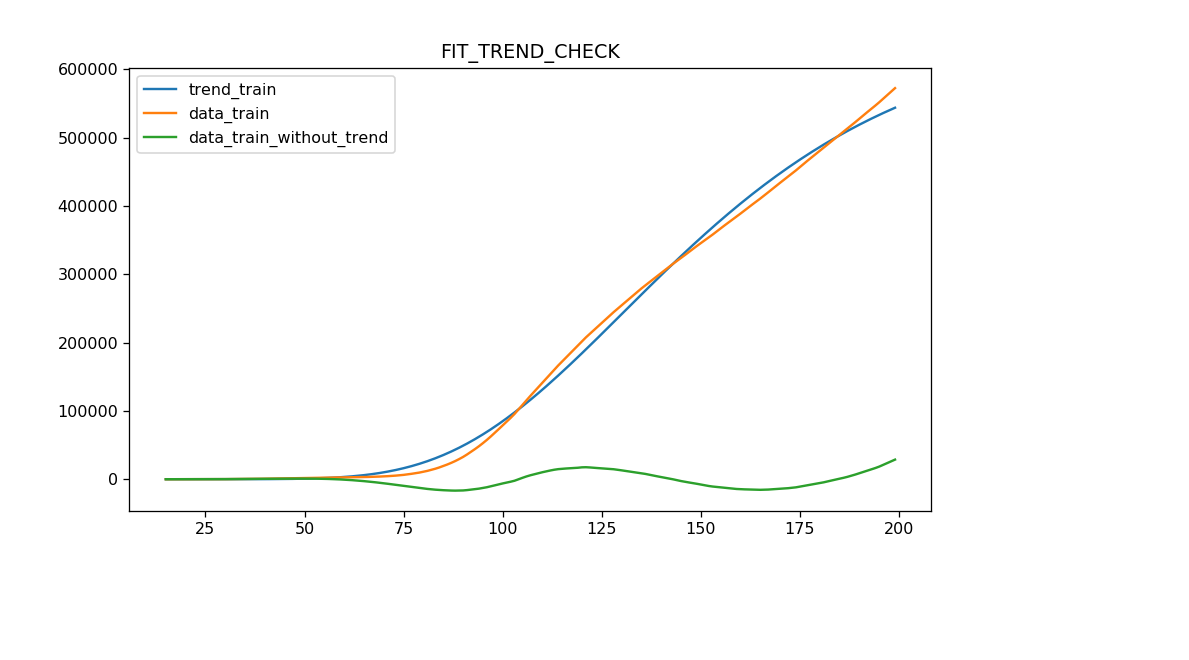

The run has finished correctly
Optimal parameters of the ML model {'n_estimators': 1.0, 'max_depth': 3.0, 'learning_rate': 0.01}
The training fit is done

 
 mae using Bayes Optimization CV (train):  7946.18122261121
rmse using Bayes Optimization CV (train):  10276.980143817822

 
 mae using Bayes Optimization CV (test):  68332.15532812904
rmse using Bayes Optimization CV (test):  72330.17435479496


<IPython.core.display.Javascript object>


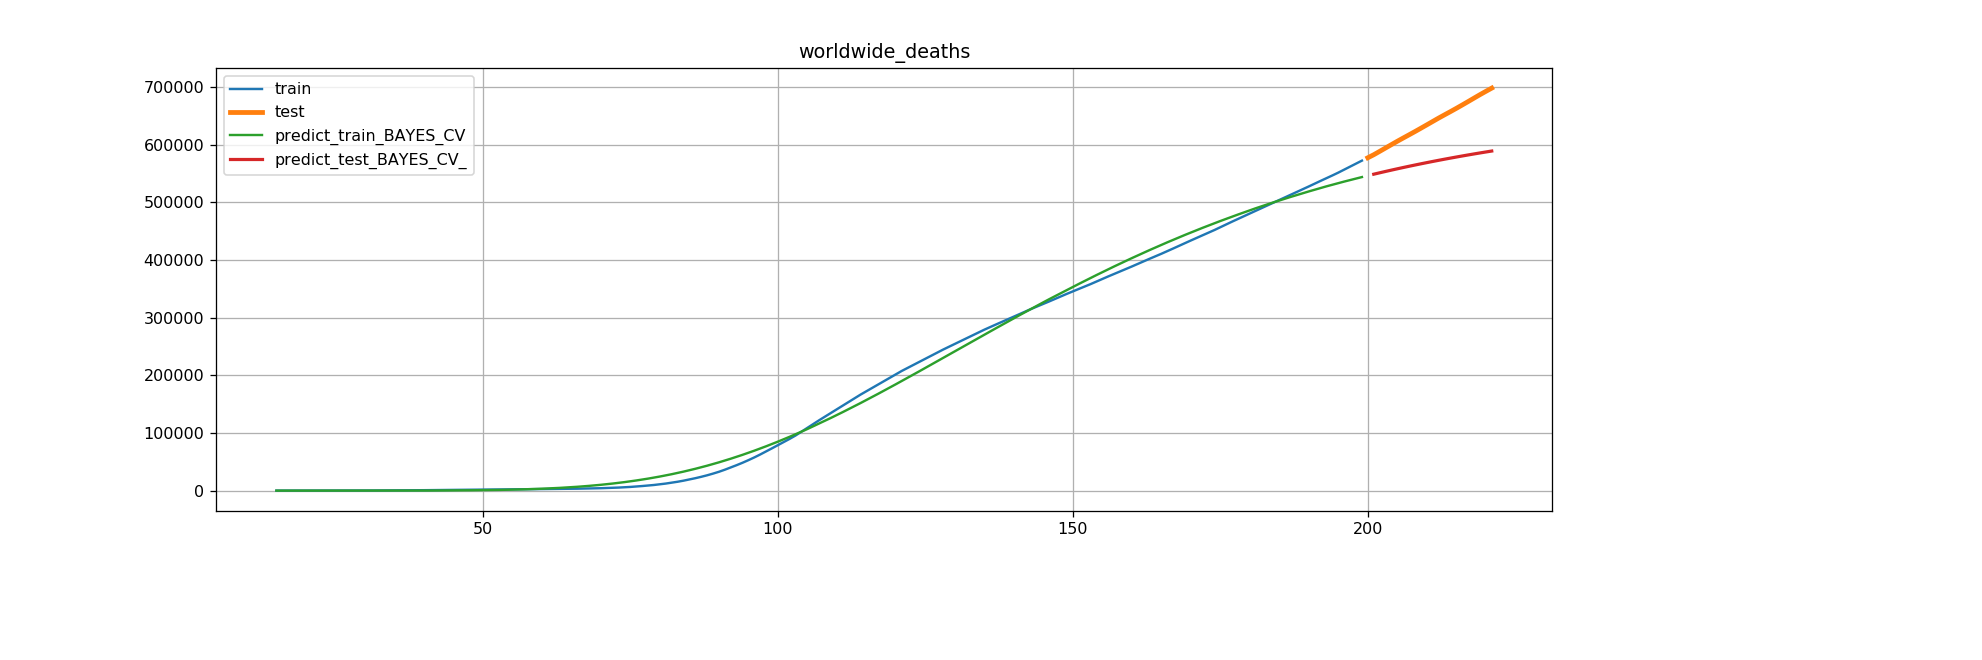

In [53]:
# 1) DEFINE A CONFIGURATION TEMPLATE
config_template = config_generator()
config_template.import_options_template(name_dataset = 'worldwide_deaths', mode_dataset = 'cum', method_trend = 'gompertz',
                                      ML_model_choose = 'xgb', predict_intervals = False, size_train = 200,
                                      list_comunities =['world'], all_comunities_bool = False, n_sample_subset = 60,
                                      loss_function = 0, timesplitmethod = 1, percentage_validation =0.3, overlap = 0.3,
                                      max_iter = 50, plot_mode = 2, metrics_print = True, plot_print = True, 
                                      bayes_tuning_on = True) 

#Run the simulation  (Replace the configuration options)
error, data = main_project_special(DELAY = 15, config_object = config_template)  #Call the special function.
#error, data = main_project(config_object = config_template)

In [47]:
#ARTIFICIAL main_created (that incorporates the DELAY as an input for the main_project_special() function)

from Bayes_Optimization.bayes_optim import Bayesian_Opt
import numpy as np
import pandas as pd
from Plots_and_error.results import evaluate, plot_comunities, global_prediction_plot
from Datasets.datasets_prepare import import_datasets
from Utils.feature_engineering import stack_features
from Decompose.parameters_adjusted_datasets import load_parameters_adjusted
import sys
from config_generator import config_generator
import configparser

def check_programmed_ways(mode_dataset, method_trend, ML_model_choose):
    train_predict_plot = True

    if (mode_dataset == 'cum') and (method_trend == 'polynomic'):
        print('\n','It is not a programmed option using a acumulated dataset '
                   'with a polynomic trend.','\n','\n','Put again the parameters')
        sys.exit()

    if method_trend == 'polynomic':  #We only apply log(Series) if after we fit the trend with a polynomic curve
        log_transform = True
    else:
        log_transform = False

    if (ML_model_choose == 'SARIMA') or (ML_model_choose == 'NN'):
        train_predict_plot = False

    return log_transform, train_predict_plot

#PREPARE THE DATA FOR ONE COMUNITY SELECTED AND RETURN IT PROCESSED IN A LIST
def data_prepare(data, Comunity:str, size_train: int, name_dataset: str):
    print(data)
    if data.shape[0] == 1:  #For this Datasets that only talk about one region as a Nation for example -- 1 row
        dat_com = data.T
    else:
        dat_com = pd.DataFrame(data.loc[Comunity])
    size_dat = len(dat_com)
    print('Total sample size of the dataset prepared: ',size_dat)
    
    DELAY = 15
    #Split into train and test
    SIZE_TRAIN = size_train
    data_train, data_test = dat_com.iloc[DELAY:SIZE_TRAIN], dat_com.iloc[SIZE_TRAIN:]
    x_train, x_test = np.array(range(DELAY, SIZE_TRAIN)), np.array(range(SIZE_TRAIN, dat_com.shape[0]))

    #Feature Engineering (General)
    season_length = 7
    intervals = int(np.ceil(size_dat / season_length))
    vec = np.tile(list(range(season_length)), intervals)
    x_train_week = np.hstack((x_train.reshape(-1, 1), vec[DELAY:SIZE_TRAIN].reshape(-1, 1)))
    x_test_week = np.hstack((x_test.reshape(-1, 1), vec[SIZE_TRAIN : SIZE_TRAIN + len(x_test)].reshape(-1, 1)))
    
    x_train_week = np.hstack((x_train_week.reshape(-1, 2), cases_values.values.squeeze()[:x_train_week.shape[0]].reshape(-1, 1)))
    x_test_week = np.hstack((x_test_week.reshape(-1, 2), cases_values.values.squeeze()[x_train_week.shape[0]:].reshape(-1, 1)))
    print(x_train_week)

    return [x_train_week, data_train, x_test_week, data_test]

#READS THE CONFIGURATION VALUES OF "config.ini" AND KEEP THEM IN A DICTIONARY "conf".
def config_function():
    config = configparser.ConfigParser()
    config.read('config.ini')
    conf = {}
    conf[0] = config['DATASET_CHOOSEN']['name_dataset']
    conf[1] = config['DATASET_CHOOSEN']['mode_dataset']
    conf[2] = config['TREND_FIT']['method_trend']
    conf[3] = config['ML_METHOD']['ml_model_choose']
    conf[4] = config['ML_METHOD'].getboolean('predict_intervals')
    conf[6] = int(config['DATASET_STRUCTURE']['size_train'])
    conf[7] = int(config['CV_BAYES']['n_sample_subset'])
    conf[8] = int(config['CV_BAYES']['loss_function'])
    conf[9] = int(config['TIME_SPLIT_CV']['timesplitmethod'])
    conf[10] = float(config['TIME_SPLIT_CV']['percentage_validation'])
    conf[11] = float(config['TIME_SPLIT_CV']['overlap'])
    conf[12] = int(config['RUN_BAYES_OPT_ITERATION']['max_iter'])
    conf[13] = int(config['PLOT_CONFIGURATION']['plot_mode'])
    conf[14] = config['PLOT_CONFIGURATION'].getboolean('metrics_print')
    conf[15] = config['PLOT_CONFIGURATION'].getboolean('plot_print')
    conf[16] = config['RUN_BAYES_OPT_ITERATION'].getboolean('bayes_tuning_on')
    print(conf)
    return conf

#MAIN FUNCTION OF THE MODULE: RUN THE PROGRAM
def main_project_special(DELAY, config_object = config_generator()):
    
    #ENGINEERING FEATURE EXTRA

    DELAY = DELAY
    cases_values = data_clean_cases.T.iloc[:-DELAY]
    cases_values = cases_values.T

    #Import the list of communities and overwrite the configuration values by those selected on config_generator.py
    # If activate = False, read the existent config.ini instead of overwritting
    list_comunities = config_object.config_replace_ini(activate = True)
    conf = config_function()  #Keep the dictionary with all the configured parameters

    #Verifies a good set of parametes is choosen, import the dataset choosen of the import_datasets module and
    #load the adjusted and fixed parameters for the fitting trend methods
    log_transform, train_predict_plot = check_programmed_ways(conf[1], conf[2], conf[3])
    data_clean= import_datasets(name = conf[0], mode = conf[1])
    parameters_trend = load_parameters_adjusted(conf[0], conf[2], data_clean)
    print('Adjusted parameters for fitting the trend: ',parameters_trend)

    #If True select all communities of the dataset
    if list_comunities == 'all':
        list_comunities = parameters_trend.keys()

    store_data = {}
    for com in list_comunities:

        #Prepare and process the dataframe for one community or region of the dataset
        x_train_features, data_train, x_test_features, data_test = data_prepare(data_clean, com, size_train= conf[6],
                                                                                name_dataset = conf[0])
        #Inicialize the Bayesian_Opt Object with all the configuration parameters chosen
        model = Bayesian_Opt(x_train_features,
                         data_train,
                         n_sample_subset = conf[7],
                         model_choose = conf[3],
                         predict_intervals = conf[4],
                         loss_function = conf[8],
                         log_transform = log_transform,
                         fit_trend_method = conf[2],
                         parameters_trend = parameters_trend[com],
                         mode_dataset = conf[1],
                         timesplitmethod=conf[9],
                         percentage_validation=conf[10],
                         overlap = conf[11],
                         bayes_tuning_on = conf[16])

        #Run the Bayesian Optimization
        param, eval = model.run(max_iter = conf[12])
        print('Optimal parameters of the ML model', param)
        #They aren't the last parameters corresponding to the last iteration. They correspond to the best rsme.

        #Fit the best model and predicts
        model.fit()
        prediction_train = model.predict(x_train_features)
        prediction_test = model.predict(x_test_features)
        store_data[com] = [x_train_features[:,0], data_train, prediction_train,
                            x_test_features[:,0], data_test, prediction_test]


    ## Plot and Error functions (1 after 1, all together in different subfigures, all together added in same figure).
    # We obtain the error test (default = rmse) and predictions (for the last mode)
    if conf[13] == 0:
        error_test = evaluate(store_data, conf[0], conf[1], metrics_print = conf[14], plot_print = conf[15],
                              predict_intervals = conf[4], train_predict_plot = train_predict_plot)
    if conf[13] == 1:
        error_test = plot_comunities(store_data, conf[0], conf[1], metrics_print = conf[14], plot_print = conf[15],
                                     predict_intervals = conf[4], train_predict_plot = train_predict_plot)
    if conf[13] == 2:
        error_test, data_out = global_prediction_plot(store_data, conf[0], conf[1], metrics_print= conf[14],
                                                      plot_print = conf[15], predict_intervals = conf[4],
                                                      train_predict_plot = train_predict_plot)
        return error_test, data_out


    print('finish')
    return error_test

RESULTS: SEEMS THAT IT DON'T IMPROVE THE PREDICTIONS IN XGBOOST. Therefore, we can't know the average number of days